In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision  
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import csv
import os
from os import listdir
import torch
from PIL import Image
import torchvision.transforms as transforms
import sys
import array
import tensorflow as tf

c:\Users\Natasha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = [] #total cleaned data array

# all_ingredients = set({}) #total types of ingredients data set

# Reading AllRecipes CSV file
#['Recipe Name;Review Count;Recipe Photo;Author;Prepare Time;Cook Time;Total Time;Ingredients;Directions;RecipeID']
#   0           1               2          3        4           5           6           7         8         9
os.chdir(r"D:\APS360\Primary Model\allrecipes")
with open('clean_recipes.csv', mode='r') as f:
    read = f.readlines()
    n = -1
    for line in read:
        tmp1, tmp2, tmp3 = [], [], []
        tmp1 += line.split(';')
        tmp2.append(tmp1[0]) #Recipe name
        tmp2.append(tmp1[2]) #Recipe photo URL
        tmp3 = tmp1[7].split(',') #spliced cleaned ingredients
        tmp2.append(tmp3)
        # print(tmp3)
        # all_ingredients.update(tmp3)
        # for j in range (0, len(tmp3)):
        #     tmp_point = tmp3[j]
        #     all_ingredients.update(tmp_point)

        # all_ingredients |= set(tmp3)
        tmp2.append(tmp1[8].split('**')) #spliced cooking directions
        tmp2.append(n)
        data.append(tmp2) #add to total list
        n += 1

del data[0] #remove label row


print("Original Data Loading Done.")

print("Loading Done.")
print(len(data))




Original Data Loading Done.
Loading Done.
12351


In [3]:
# #list with index values of invalid images
trashIndex = [12331, 12328, 12310, 12301, 12291, 12299, 12274, 12263, 12257, 12252, 12243, 12238, 12234, 12221, 12217, 12212, 12207, 12162, 12136, 12131, 12119, 12118, 12111, 12080, 12077, 12067, 12040, 12038, 12032, 12022, 12020, 12018, 12016, 12013, 11997, 11993, 11954, 11950, 11945, 11926, 11916, 11897, 11888, 11882, 11863, 11861, 11859, 11857, 11856, 11855, 11854, 11849, 11843, 11841, 11786, 11785, 11779, 11769, 11752, 11723, 11720, 11705, 11668, 11662, 11640, 11634, 11604, 11556, 11514,
11500, 11490, 11463, 11425, 11386, 11384, 11383, 11377, 11369, 11367, 11362, 11359, 11357, 11355, 11351, 11347, 11302, 11288, 11265, 11264, 11263, 11261, 11260, 11249,
11229, 11172, 11163, 11158, 11151, 11139, 11114, 11113, 11112, 11107, 11077, 11037, 11023, 11002, 10980, 10965, 10953, 10913, 10906, 10903, 10886, 10864, 10863, 10860, 10840, 10824, 10796, 10774, 10748, 10744, 10743, 10738, 10737, 10736, 10731, 10723, 10722, 10701, 10683, 10665, 10658, 10645, 10644, 10641, 10630, 10592, 10586, 10565, 10564, 10550, 10546, 10542, 10519, 10510, 10484, 10480, 10469, 10461, 10439, 10419, 10408, 10377, 10369, 10364, 10337, 10334, 10325, 10323, 10314, 10313, 10311, 10306, 10301, 10229, 10209,
10191, 10178, 10174, 10165, 10153, 10145, 10136, 10104, 10100, 10082, 10066, 10059, 10051, 10047, 9997, 9983, 9978, 9969, 9965, 9951, 9909, 9907, 9901, 9897, 9890, 9865, 9859, 9844, 9839, 9828, 9820, 9816, 9804, 9767, 9766, 9756, 9736, 9717, 9683, 9666, 9654, 9637, 9636, 9622, 9619, 9606, 9599, 9596, 9595, 9566, 9559, 9509, 9500, 9495, 9472, 9466, 9461, 9424, 9423, 9422, 9398, 9386, 9385, 9373, 9330, 9327, 9323, 9299, 9283, 9274, 9245, 9240, 9227, 9195, 9149, 9098, 9035, 9022, 8980, 8976, 8974, 8920, 8917, 8915, 8911, 8910, 8895, 8888, 8887, 8884, 8878, 8872, 8862, 8850, 8838, 8811, 8804, 8757, 8739, 8737, 8724, 8637, 8636, 8635,
8630, 8629, 8612, 8610, 8607, 8567, 8546, 8544, 8533, 8521, 8514, 8505, 8488, 8469, 8466, 8459, 8442, 8401, 8385, 8382, 8380, 8373, 8351, 8348, 8340, 8339, 8336, 8325, 8321, 8305, 8281, 8273, 8243, 8238, 8230, 8206, 8204, 8175, 8166, 8165, 8160, 8159, 8158, 8152, 8149, 8145, 8141, 8132, 8115, 8099, 8096, 8091, 8079, 8067, 8063, 8034, 8033, 8024, 8007, 7974, 7921, 7920, 7911, 7906, 7903, 7902, 7898, 7895, 7893, 7892, 7890, 7889, 7885, 7872, 7871, 7855, 7824, 7815, 7809, 7772, 7761, 7745, 7713, 7712, 7707, 7704, 7688, 7667, 7665, 7642, 7640, 7625, 7577, 7542, 7539, 7533, 7529, 7512, 7494, 7488, 7484, 7477, 7464, 7459, 7388, 7366, 7365, 7352, 7350, 7323, 7314, 7279, 7258,
7257, 7256, 7216, 7185, 7175, 7165, 7163, 7119, 7111, 7089, 7050, 6999, 6927, 6896, 6879, 6850, 6791, 6742, 6736, 6728, 6700, 6681, 6655, 6637, 6567, 6542, 6541, 6533, 6513, 6503, 6494, 6481, 6471, 6435, 6425, 6408, 6392, 6384, 6365, 6347, 6341, 6338, 6334, 6330, 6314, 6313, 6237, 6220, 6200, 6177, 6174, 6155, 6144, 6140, 6082, 6069, 5993, 5980, 5975, 5968, 5957, 5954, 5953, 5949, 5941, 5932, 5929, 5926, 5915, 5897, 5840, 5817, 5815, 5805, 5784, 5725, 5724, 5715, 5711, 5710, 5706, 5693, 5692, 5685, 5676, 5656, 5650, 5579, 5560, 5449, 5350, 5332, 5324, 5313, 5299, 5298, 5294, 5278, 5273, 5270, 5269, 5263, 5163, 5162, 5154, 5124, 5091, 5080, 8063, 5055, 5053, 5048,
5045, 5042, 5037, 4992, 4990, 4980, 4969, 4956, 4891, 4886, 4882, 4850, 4845, 4837, 4832, 4816, 4812, 4803, 4801, 4791, 4790, 4789, 4769, 4738, 4687, 4675, 4661, 4660, 4632, 4626, 4625, 4603, 4587, 4582, 4581, 4559, 4538, 4527, 4525, 4518, 4505, 4504, 4497, 4496, 4456, 4432, 4425, 4411, 4361, 4316, 4304, 4214, 4204, 4197, 4188, 4183, 4169, 4167, 4140, 4139, 4127, 4122, 4120, 4115, 4107, 4105, 4097, 4090, 4076, 4073, 4069, 4068, 4059, 4055, 4046, 4044, 4042, 4036, 4035, 4033, 4029, 4028, 4026, 4019, 4006, 3995, 3990, 3989, 3974, 3959, 3954, 3943, 3931, 3899, 3897, 3896, 3891, 3876, 3858, 3844, 3836, 3833, 3832, 3831, 3828, 3819, 3783, 3781, 3777, 3769, 3767, 3756, 3745, 3728, 3725,
3675, 3617, 3612, 3562, 3549, 3532, 3513, 3498, 3451, 3444, 3439, 3438, 3428, 3422, 3418, 3416, 3406, 3399, 3395, 3374, 3358, 3356, 3344, 3343, 3332, 3329, 3317, 3302, 3282, 3277, 3263, 3257, 3252, 3247, 3245, 3224, 3221, 3214, 3213, 3209, 3208, 3206, 3194, 3185, 3183, 3182, 3181, 3177, 3167, 3162, 3136, 3131, 3118, 3117, 3106, 3100, 3090, 3087, 3085, 3075, 3072, 3070, 3062, 3061, 3052, 3039, 3029, 3026, 3018, 3013, 3012, 2988, 2978, 2976, 2956, 2952, 2949, 2943, 2933, 2929, 2901, 2896, 2887, 2886, 2868, 2864, 2855, 2845, 2842, 2831, 2829, 2820, 2816, 2812, 2806, 2792, 2779, 2772, 2770, 2769, 2766, 2763, 2756, 2739, 2737, 2733, 2731, 2727, 2723, 2720, 2718, 2713, 2708, 2700, 2683, 2681, 2672,
2663, 2643, 2637, 2635, 2632, 2631, 2626, 2624, 2614, 2607, 2597, 2594, 2592, 2591, 2590, 2585, 2580, 2561, 2559, 2554, 2553, 2552, 2548, 2530, 2529, 2511, 2502, 2491, 2484, 2483, 2453, 2452, 2447, 2446, 2428, 2425, 2409, 2407, 2398, 2396, 2367, 2363, 2356, 2355, 2349, 2344, 2297, 2293, 2287, 2274, 2269, 2264, 2253, 2242, 2222, 2219, 2210, 2199, 2195, 2181, 2170, 2165, 2164, 2152, 2150, 2149, 2143, 2098, 2091, 2089, 2085, 2083, 2082, 2079, 2076, 2073, 2070, 2063, 2061, 2051, 2045, 2038, 2036, 2033, 2032, 2030, 2029, 2027, 2021, 2019, 2012, 2001, 1992, 1985, 1981, 1975, 1959, 1957, 1946, 1936, 1910, 1875, 1873, 1843, 1827, 1813, 1809, 1799, 1787, 1782, 1778, 1770, 1768, 1758, 1754,
1746, 1742, 1739, 1736, 1733, 1729, 1723, 1720, 1713, 1697, 1691, 1627, 1626, 1599, 1594, 1584, 1578, 1577, 1543, 1509, 1487, 1419, 1412, 1351, 1336, 1310, 1287, 1254, 1226, 1194, 1174, 1102, 1090, 1067, 1032, 1029, 1014, 990, 988, 984, 970, 961, 957, 944, 934, 928, 920, 917, 904, 870, 868, 834, 820, 807, 806, 776, 773, 772, 762, 756, 755, 752, 731, 726, 721, 718, 714, 709, 692, 688, 674, 672, 670, 669, 665, 663, 659, 652, 650, 626, 617, 612, 593, 591, 583, 574, 544, 538, 537, 523, 522, 502, 494, 479, 470, 469, 461, 456, 449, 439, 431, 430, 418, 403, 399, 389, 382, 347, 344, 342, 341, 338, 337, 301, 295, 291, 287, 274, 260, 239, 237, 236, 235, 228, 219, 210, 163, 102, 93, 78, 60]

# # print(len(data))
# # print(len(trashIndex))


#deleting images and data entries at specified indices
for i in range (0, len(trashIndex)):
    del data[trashIndex[i]]

# # print(len(data))
print("Data Cleaning Complete.")
print(len(data))

Data Cleaning Complete.
11376


In [4]:
import os
from os import listdir

main_list = [] #main data list, organized in sequence of: image tensor, spliced ingredients list
#define universal image transform
transform = transforms.Compose([transforms.PILToTensor()])
# folder_dir = "images"
index = 0
os.chdir(r"D:\APS360\Primary Model\allrecipes\images") #replace directory here to system directory to image folder

for i in range(0, len(data)):
    try:
        tmp = []
        image = Image.open(str(data[i][4])+'.jpg')
        tmp_tensor = transform(image)
        tmp.append(tmp_tensor)
        tmp.append(data[i][2])
        # tmp.append(data[index][3]) #adding cooking directions
        main_list.append(tmp)
    except:
        pass


# os.chdir("..") #reset directory to previous layer
os.chdir(r"D:\APS360\Primary Model\allrecipes\images")
print(len(main_list))
print(len(data))

11374
11376


In [5]:
# Only keeping images with the right tensor size
data_list = []
for i in range(len(main_list)):
  if main_list[i][0].size()==torch.Size([3, 224, 224]):
    data_list.append(main_list[i])
print(len(data_list))

# Checking for None
for i in range(len(data_list)):
  if data_list[i]==None:
    print(i)

# Dividing into training and validation data
split = int(6/7*len(data_list))
data_train = data_list[:split]
data_val = data_list[split:]


11368


In [6]:
os.chdir(r"D:\APS360\Primary Model\allrecipes")
from open_npz import ingredients

Master ingredients list loading complete.


In [99]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = torchvision.models.resnet50(pretrained=True)
        #for param in resnet.parameters():
            #param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1] #get rid of the last layer of ResNet to replace with classification later
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)
        self.batch= nn.BatchNorm1d(embed_size,momentum = 0.01)
        self.embed.weight.data.normal_(0., 0.02)
        self.embed.bias.data.fill_(0)
        
    def forward(self, images):
        features = self.resnet(images)
        features = features.view(features.size(0), -1)
        features = self.batch(self.embed(features))
        return features

In [100]:
class Decoder(nn.Module):
    def __init__(self, embed_size, hidden_size, word_pool_size, num_layers=1):
        super(Decoder, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embed_size= embed_size
        self.drop_prob= 0.2
        self.vocabulary_size = word_pool_size
        self.lstm = nn.LSTM(self.embed_size, self.hidden_size , self.num_layers,batch_first=True)
        self.dropout = nn.Dropout(self.drop_prob)
        self.embed = nn.Embedding(self.vocabulary_size, self.embed_size)
        self.linear = nn.Linear(hidden_size, self.vocabulary_size)
        self.embed.weight.data.uniform_(-0.1, 0.1)
        self.linear.weight.data.uniform_(-0.1, 0.1)
        self.linear.bias.data.fill_(0)
    
    def forward(self, features, captions):
        embeddings = self.embed(captions)
        features = features.unsqueeze(1)
        embeddings = torch.cat((features, embeddings[:, :-1,:]), dim=1)
        hiddens, c = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs

"""
class Decoder(nn.Module):
    def __init__(self, embed_size, hidden_size, word_pool_size, num_layers=1):
        super(Decoder, self).__init__()
        self.dec_embedding = nn.Embedding(word_pool_size, embed_size)
        dec_layer = nn.TransformerDecoderLayer(embed_size, nhead = 2,dim_feedforward = hidden_size, dropout = 0.3)
        self.decoder = nn.TransformerDecoder(dec_layer, num_layers = num_layers)

        self.dense = nn.Linear(embed_size, word_pool_size)
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self, features, captions):
        transformer_out = self.decoder(captions,features)
        final_out = self.dense(transformer_out)
        return self.log_softmax(final_out)
"""

'\nclass Decoder(nn.Module):\n    def __init__(self, embed_size, hidden_size, word_pool_size, num_layers=1):\n        super(Decoder, self).__init__()\n        self.dec_embedding = nn.Embedding(word_pool_size, embed_size)\n        dec_layer = nn.TransformerDecoderLayer(embed_size, nhead = 2,dim_feedforward = hidden_size, dropout = 0.3)\n        self.decoder = nn.TransformerDecoder(dec_layer, num_layers = num_layers)\n\n        self.dense = nn.Linear(embed_size, word_pool_size)\n        self.log_softmax = nn.LogSoftmax()\n    \n    def forward(self, features, captions):\n        transformer_out = self.decoder(captions,features)\n        final_out = self.dense(transformer_out)\n        return self.log_softmax(final_out)\n'

In [9]:
# Creating dictionaries for cross referencing ingredient name to specific number (assigned by index value)
ing_map = {}
for i in range(0,len(ingredients)):
    ing_map.update({ingredients[i] : i})

num_map = {}
for i in range(0,len(ingredients)):
    num_map.update({i : ingredients[i]})


In [14]:
# Adding in missing ingredients to dicts
ing_map.update({"oat" : 3501})
ing_map.update({"poppy" : 3502})
ing_map.update({"<start>" : 3503})
ing_map.update({"<end>" : 3504})
ing_map.update({"<pad>" : 3505})

num_map.update({3501 : "oat"})
num_map.update({3502 : "poppy"})
num_map.update({3503 : "<start>"})
num_map.update({3504 : "<end>"})
num_map.update({3505 : "<pad>"})


In [34]:
# Converting all ingredients lists in recipes to numbers using dicts
def convert_list_to_num(lists):
    ans = []
    ans.append(ing_map["<start>"])
    for i in range(0,len(lists)):
        ans.append(ing_map[lists[i]])
    ans.append(ing_map["<end>"])


    for i in range(len(lists) + 2, 32):
        ans.append(ing_map["<pad>"])
    return ans

In [116]:
"""
max_value = 0

for i in range(0,len(data_train)):
    if (len(data_train[i][1]) > max_value):
        max_value = len(data_train[i][1])

print(max_value)
"""

30


In [111]:
def train(encoder, decoder, num_epochs,batch_size,criterion,optimizer,word_pool_size):
    iters, losses = [],[]

    for epoch in range(0, num_epochs):

            images = []
            ing_list = []

            for i in range(0,batch_size):
                try: 
                    images.append(data_train[i + epoch*batch_size][0])
                    temp = convert_list_to_num(data_train[i+ epoch*batch_size][1])
                    temp = torch.IntTensor(temp)
                    ing_list.append(temp)
                
                except:
                    continue

            if (len(ing_list) > 0):
                print(epoch)
                images = torch.stack(images)
                images = images.reshape([len(images), 3, 224, 224])
                images = images.type(torch.FloatTensor)

                ing_list = torch.stack(ing_list)
                ing_list = ing_list.type(torch.IntTensor)

                # Zero the gradients.
                decoder.zero_grad()
                encoder.zero_grad()
                
                try:
                    # pass inputs into encoder and decoder
                    features = encoder(images)
                    outputs = decoder(features, ing_list)
                    print(outputs.shape)
                except:
                    continue
                
                # Calculate the batch loss.
        #         print("outputs.shape: ", outputs.shape)
                loss = criterion(outputs.view(-1, word_pool_size), ing_list.view(-1).long())
                # Backward pass.
                loss.backward()
                
                # Update the parameters in the optimizer.
                optimizer.step()
                optimizer.zero_grad() 

                iters.append(epoch)
                losses.append(float(loss)/batch_size)
                

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

c:\Users\Natasha\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Natasha\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0
torch.Size([32, 32, 3505])
1
torch.Size([32, 32, 3505])
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
torch.Size([32, 32, 3505])
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


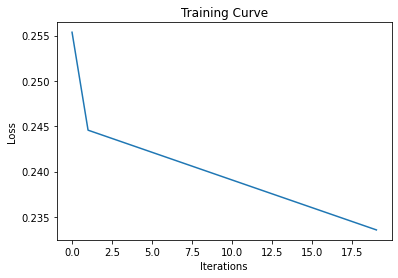

In [112]:
# Defining Hyperparameters
batch_size = 32 
embed_size = 512
hidden_size = 512
num_epochs = 50

# The size of the vocabulary.
word_pool_size = len(ing_map)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = Decoder(embed_size, hidden_size, word_pool_size)

# Use GPUs if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)


criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.embed.parameters()) #+ list(encoder.bn.parameters())
optimizer = torch.optim.Adam(params, lr=0.001)#, betas=(0.9, 0.999), eps=1e-08)

train(encoder,decoder,num_epochs,batch_size,criterion,optimizer,word_pool_size)